In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
data_size = 100
x = np.array(range(data_size))
mu, sigma = 0, 10
true_y = x + 100
y = x + 100 + np.random.normal(mu, sigma, data_size)

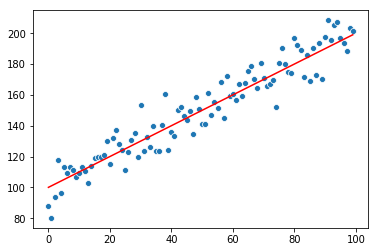

In [3]:
sns.scatterplot(x, y)
sns.lineplot(x, true_y, color = 'r')

In [4]:
# x = x.reshape(-1, 1)
new_x = np.stack((x.reshape(-1, 1), np.ones(shape=(x.shape[0], 1))), axis = 1).reshape(-1, 2)
new_y = y.reshape(-1, 1)

In [5]:
w = np.dot(np.dot(np.linalg.inv(np.dot(new_x.transpose(), new_x)), new_x.transpose()), new_y)
print(w)

[[ 1.02085163]
 [99.76123634]]


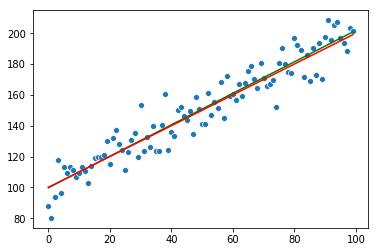

In [6]:
sns.scatterplot(x, y)
# sns.lineplot(x, y, color = 'r')
sns.lineplot(x, np.dot(new_x, w).flatten(), color = 'g')
sns.lineplot(x, true_y, color = 'r')

sometimes we cannot make sure that x is reverable

## Gradient descent

$$\frac{\partial l}{\partial \beta} = 2x^T \(x\beta - y\)\$$

update:

$$\beta_{i+1} = \beta_{i} - \alpha \times \frac{\partial l}{\partial \beta}$$

loss at 0th iteration is 96888489579.38467
loss at 0th iteration is 96888489579.38467
loss at 1th iteration is 3004321598581.9346
loss at 2th iteration is 93158326067253.47
loss at 3th iteration is 2888663576367565.0
loss at 4th iteration is 8.957199672939405e+16
loss at 5th iteration is 2.777458290525759e+18
loss at 6th iteration is 8.61237310466062e+19
loss at 7th iteration is 2.6705340903552215e+21
loss at 8th iteration is 8.280821373019749e+22
loss at 9th iteration is 2.567726166069631e+24


D:\download\Programming_language\python\Ana\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
D:\download\Programming_language\python\Ana\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: overflow encountered in square
  
D:\download\Programming_language\python\Ana\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in square
D:\download\Programming_language\python\Ana\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in multiply
  # This is added back by InteractiveShellApp.init_path()


loss at 10000th iteration is nan
loss at 20000th iteration is nan
loss at 30000th iteration is nan
loss at 40000th iteration is nan
loss at 50000th iteration is nan
loss at 60000th iteration is nan
loss at 70000th iteration is nan
loss at 80000th iteration is nan
loss at 90000th iteration is nan


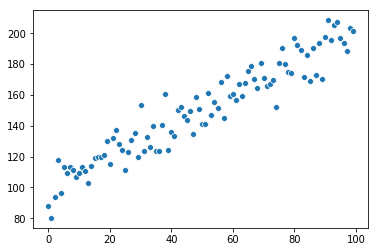

In [18]:
import matplotlib.pyplot as plt

plt.figure()
sns.scatterplot(x, y)

beta = np.array([100, 5]).reshape(-1, 1)
lamda = 0.001

for i in range(100000):
    loss = (np.dot(new_x, beta) - new_y)
    gradient = 2 * np.dot(new_x.transpose(),  loss)
    old = beta
    beta = beta - lamda * gradient /new_x.shape[0]
    cost = np.sum(np.square(np.dot(new_x, beta) - new_y))
    if i < 10:
        print('loss at {}th iteration is {}'.format(i, cost))
    if i % 10000 == 0:
        print('loss at {}th iteration is {}'.format(i, cost))
    if(cost < 100):
        break
    change = np.sum(np.square(old - beta))
    if change < pow(10, -8):
        print('stop at %dth iteration'%i)
        print('loss at end is: {}'.format(cost))
        break
    
sns.lineplot(x, np.dot(new_x, beta).flatten())

## Newton
$$\frac{\partial l}{\partial \beta} = 2x^T \(x\beta - y\)\$$

$$\frac{\partial ^2 l}{\partial \beta \partial \beta} = 2x^T \(x\beta - y\)\$$

update:

$$\beta_{i+1} = \beta_{i} - \alpha \times \frac{f^{'}}{f^{''}}$$

loss at 0th iteration is 3124228594.5271597
loss at 10000th iteration is 422783540.7896406
loss at 20000th iteration is 57219269.98516391
loss at 30000th iteration is 7750473.31135328
loss at 40000th iteration is 1056269.2006248443
loss at 50000th iteration is 150397.78896344433
loss at 60000th iteration is 27813.684730606597
stop at 60712th iteration
loss at end is: 25267.308737597454


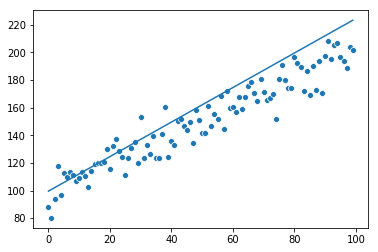

In [14]:
import matplotlib.pyplot as plt

plt.figure()
sns.scatterplot(x, y)

beta = np.array([100, 5]).reshape(-1, 1)
lamda = 0.0001

for i in range(100000):
    loss = (np.dot(new_x, beta) - new_y)
    gradient = 2 * np.dot(new_x.transpose(),  loss)
    d_gradient = 2 * np.dot(new_x.transpose(), new_x)
    old = beta
    test = np.linalg.inv(np.dot(d_gradient.transpose(), d_gradient))
    beta = beta - lamda * np.dot(test, np.dot(d_gradient.transpose(), gradient))
    cost = np.sum(np.square(np.dot(new_x, beta) - new_y))
    if i % 10000 == 0:
        print('loss at {}th iteration is {}'.format(i, cost))
    change = np.sum(np.square(old - beta))
    if change < pow(10, -9):
        print('stop at %dth iteration'%i)
        print('loss at end is: {}'.format(cost))
        break
    
sns.lineplot(x, np.dot(new_x, beta).flatten())